# Python Code for Project 2 -- Analysis of Avocado Sales in the United States
by Radhika Satapathy, Timothy Quek and Marcial Nava 

Below is the code used to analyze the data and answer the different research questions stated in our original proposal and our final project. 

### <font color=blue>LOADING DATA:</font>
In this section we load the data to be analyzed into pandas data frames.

#### <font color=black>Step 1: Import Required Modules</font>

In [1]:
#CODE

# Import required modules
import datetime
from datetime import datetime as dt
import copy
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
import copy


#### <font color=black>Step 2: Load Avocado Sales Data</font>

In [2]:
#CODE

# Load the avocado data file
avo_df = pd.read_csv('avocado_timothy.csv', parse_dates = ['Date'])

# Display sample data
avo_df.head(5)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [3]:
# Display data types of columns
avo_df.dtypes


Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [4]:
# Replace white spaces in column names
print(avo_df.columns)
avo_df.columns = avo_df.columns.str.replace('\s+', '')
print(avo_df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')
Index(['Unnamed:0', 'Date', 'AveragePrice', 'TotalVolume', '4046', '4225',
       '4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type',
       'year', 'region'],
      dtype='object')


### <font color=blue>SANITY CHECK, DATA CLEANSING:</font>
In this section we perform a sanity check of the data and clean the data from any abnormal observation or error.

In [5]:
# Overall check for missing values
avo_df.isnull().sum()

Unnamed:0       0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [6]:
avo_df.shape

(18249, 14)

#### 2.13 Total Volume Values Check

In [7]:
# Extract rows where Total Volume figures don't add up to individual columns

def checkTotal(row):
    ans = row['TotalVolume'] - row['4046'] - row['4225']- row['4770']- row['TotalBags']
    return int(ans)

avo_df['check1'] = avo_df.apply(checkTotal, axis=1)
avo_df

# sort values in descending order of difference
check1_sort = avo_df[avo_df['check1'] > 0].sort_values('check1', ascending=False)

# filter just the necessary columns and view
check1_sort_filter = check1_sort.filter(items=['Date', 'region', 'type', 'check1', 'TotalVolume','4046', '4225', '4770', 'TotalBags'])
# check1_sort_filter

# 209 rows where TotalVolume does not add up


#### 2.14 Update Total Volumes of Inconsistent Rows

In [8]:
# update TotalVolumes correctly
def updateTotal(row):
    ans = row['4046'] + row['4225'] + row['4770'] + row['TotalBags']
    return int(ans)

avo_df['TotalVolume'] = avo_df.apply(updateTotal, axis=1)

# visually verify data for a region or city
#avo_df[avo_df.region == 'California']

# once again check to ensure Total Volumes add up correctly
def checkTotal(row):
    ans = row['TotalVolume'] - row['4046'] - row['4225']- row['4770']- row['TotalBags']
    return int(ans)

avo_df['check1'] = avo_df.apply(checkTotal, axis=1)
avo_df[avo_df['check1'] > 0].count()

Unnamed:0       0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
check1          0
dtype: int64

#### Describing the Variables with Volume and Price Data

In [9]:
avo_df[['AveragePrice', 'TotalVolume', '4046', '4225', '4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850641.44,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43
std,0.40,3453545.49,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89
min,0.44,84.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.10,10830.00,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00
50%,1.37,107376.00,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00
75%,1.66,432962.00,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50
max,3.25,62505646.00,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65


#### Doing Value Counts on the 'Type', 'Year' and 'Region' Data

In [10]:
avo_df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [11]:
avo_df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [12]:
avo_df['region'].value_counts()

Charlotte              338
West                   338
TotalUS                338
Northeast              338
Plains                 338
SouthCarolina          338
Pittsburgh             338
BuffaloRochester       338
Boston                 338
Houston                338
Denver                 338
SanFrancisco           338
GrandRapids            338
Atlanta                338
HartfordSpringfield    338
SouthCentral           338
MiamiFtLauderdale      338
CincinnatiDayton       338
LosAngeles             338
California             338
Midsouth               338
Columbus               338
NewYork                338
SanDiego               338
Southeast              338
Syracuse               338
Albany                 338
PhoenixTucson          338
Sacramento             338
Roanoke                338
Boise                  338
HarrisburgScranton     338
NewOrleansMobile       338
Louisville             338
BaltimoreWashington    338
Indianapolis           338
StLouis                338
P

#### Doing value counts on the bags data

In [13]:
avo_df['TotalBags'].value_counts()

0.00          15
300.00         5
990.00         5
916.67         4
266.67         4
550.00         4
856.67         3
153.33         3
196.67         3
803.33         3
286.67         3
2110.00        3
880.00         3
106.67         3
846.67         3
436.67         3
263.33         3
260.00         3
453.33         3
613.33         3
3205.37        2
1350.00        2
293.33         2
38987.77       2
403.33         2
270.00         2
2533.33        2
523.33         2
696.67         2
1634.13        2
              ..
4516.49        1
469278.11      1
82836.10       1
46097.43       1
4431.28        1
3657.76        1
970.09         1
983840.70      1
243.63         1
57394.95       1
9670.10        1
1419928.75     1
4107.09        1
63457.85       1
8238.12        1
45081.61       1
12389.26       1
84548.09       1
758.81         1
66806.13       1
392890.13      1
76357.84       1
799.44         1
20464.55       1
81549.13       1
155484.69      1
224912.37      1
613.16        

In [14]:
avo_df['SmallBags'].value_counts()

0.00          159
203.33         11
533.33         10
223.33         10
103.33          8
326.67          8
300.00          8
196.67          8
263.33          8
123.33          8
216.67          8
20.00           8
70.00           8
286.67          7
30.00           7
40.00           7
303.33          7
450.00          7
143.33          6
273.33          6
436.67          6
916.67          6
43.33           6
293.33          6
96.67           6
106.67          6
583.33          6
580.00          6
166.67          6
116.67          6
             ... 
36175.00        1
31778.36        1
34146.46        1
68447.93        1
136440.18       1
2778.99         1
55967.51        1
356.56          1
3656.44         1
1543.88         1
19933.89        1
30505.58        1
1285655.99      1
334967.14       1
698822.91       1
21632.95        1
118219.26       1
1513.55         1
1191.51         1
73724.45        1
322925.72       1
26270.21        1
201968.43       1
18252.40        1
2619.58   

In [15]:
avo_df['LargeBags'].value_counts()

0.00         2370
3.33          187
6.67           78
10.00          47
4.44           38
13.33          28
16.67          18
6.66           18
26.67          18
20.00          14
40.00          14
23.33          13
30.00           9
60.00           9
43.33           8
8.89            8
36.67           7
50.00           7
33.33           7
53.33           6
2.65            5
46.67           5
2.64            5
5.55            4
2.22            4
11.10           4
11.11           4
70.00           4
15.56           4
2.78            4
             ... 
1372.39         1
145.59          1
48468.00        1
18477.36        1
790.24          1
5800.40         1
226.01          1
44667.33        1
60654.32        1
384.26          1
557.40          1
219296.06       1
45241.31        1
3057.90         1
55932.74        1
1517.62         1
3709.46         1
7109.08         1
21646.18        1
269.96          1
332.04          1
348148.30       1
48965.19        1
584.52          1
161965.56 

In [16]:
avo_df['XLargeBags'].value_counts()

0.00         12048
3.33            29
6.67            16
1.11            15
5.00            12
10.00            9
16.67            8
2.22             7
150.00           6
80.00            6
20.00            6
13.33            6
166.67           5
60.00            5
70.00            5
100.00           5
250.00           5
3.00             4
77.78            4
2.00             4
66.67            4
11.27            4
44.44            4
188.89           4
1680.00          4
4.50             4
320.00           4
90.00            4
30.00            4
870.00           4
             ...  
30712.05         1
338.25           1
521.66           1
1876.68          1
622.77           1
833.23           1
164.03           1
608.55           1
1947.11          1
212.82           1
1346.60          1
830.56           1
18.90            1
62027.18         1
21579.39         1
108072.79        1
28454.57         1
2721.39          1
1672.03          1
2179.17          1
92787.50         1
4970.00     

### <font color=blue>AGGREGATING AT REGIONAL LEVEL AND MERGING WITH POPULATION DATA:</font>

#### Compute TotalSales with corrected TotalVolumes

In [17]:
# add column TotalSales and set it to the product of TotalVolume and Average Price
avo_df['TotalSales'] = avo_df['TotalVolume']*avo_df['AveragePrice']
avo_df.filter(items = ['region', 'Date', 'AveragePrice', 'TotalVolume', 'TotalSales'])
avo_df.head(2)

,Unnamed:0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,check1,TotalSales
0,0,2015-12-27,1.33,64236,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,0,85433.88
1,1,2015-12-20,1.35,54876,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,0,74082.60


#### Merge 'Total Sales by Region and Year' (generated in previous code cell) with 'Population' data

In [18]:
# merging the population csv

population = pd.read_csv('population_timothy.csv')
avo_pop = avo_df.merge(population, how='left', left_on=['region','year'], right_on=['region','year'])

# adding the volume per capita variable
avo_pop['population'].isnull().sum()
avo_pop['TotalSales'] = avo_pop['TotalVolume'] * avo_pop['AveragePrice']
avo_pop['Vol_Per_Cap'] = avo_pop['TotalVolume'] / avo_pop['population'] / 1000
avo_pop['Sales_Per_Cap'] = avo_pop['TotalSales'] / avo_pop['population'] / 1000

# adding a major region tag = 1 for rows from a major region and = 0 for the rest of the rows
avo_pop['maj_region'] = 0
regions_list_str = ['California', 'West', 'Plains', 'SouthCentral', 'GreatLakes', 'Midsouth', 'Southeast', 'Northeast', 'TotalUS']

avo_pop.loc[avo_pop['region'].isin(regions_list_str), 'maj_region'] = 1

avo_pop.head()

,Unnamed:0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,check1,TotalSales,population,Vol_Per_Cap,Sales_Per_Cap,maj_region
0,0,2015-12-27,1.33,64236,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,0,85433.88,154,0.42,0.55,0
1,1,2015-12-20,1.35,54876,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,0,74082.60,154,0.36,0.48,0
2,2,2015-12-13,0.93,118220,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,0,109944.60,154,0.77,0.71,0
3,3,2015-12-06,1.08,78992,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,0,85311.36,154,0.51,0.55,0
4,4,2015-11-29,1.28,51039,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,0,65329.92,154,0.33,0.42,0


In [19]:
avo_pop[['population', 'TotalSales', 'Vol_Per_Cap', 'Sales_Per_Cap']].describe()

,population,TotalSales,Vol_Per_Cap,Sales_Per_Cap
count,18249.00,18249.00,18249.00,18249.00
mean,12219.72,927944.35,0.10,0.11
std,43688.02,3686048.37,0.15,0.16
min,151.00,133.56,0.00,0.00
25%,1305.00,17162.76,0.00,0.01
50%,2807.00,139528.73,0.03,0.04
75%,6798.00,514191.14,0.14,0.16
max,327999.00,54379912.02,1.54,1.81


### <font color=blue>RESEARCH QUESTIONS</font>


### <font color=green>Avocado Prices</font>

#### Nationwide Avocado Consumption by Avocado Type

In [20]:
# CODE

region_type_df = avo_df.groupby(['region', 'type'])

total_conventional = region_type_df.get_group(('TotalUS', 'conventional')).groupby('year').agg('sum')['TotalVolume']
total_organic = region_type_df.get_group(('TotalUS', 'organic')).groupby('year').agg('sum')['TotalVolume']

total_conv_organic = pd.concat([total_conventional, total_organic], axis=1)
total_conv_organic.columns = ['Conventional Volume','Organic Volume']

total_conv_organic['Total Volume'] = total_conv_organic['Conventional Volume'] + total_conv_organic['Organic Volume']
total_conv_organic['% Organic'] = total_conv_organic['Organic Volume'] / total_conv_organic['Total Volume'] * 100

# print('Conventional\n', total_conventional)
# print()
# print('Organic\n', total_organic)
# print()

print(total_conv_organic)

      Conventional Volume  Organic Volume  Total Volume  % Organic
year                                                              
2015           1623685890        33569270    1657255160       2.03
2016           1770259362        48899727    1819159089       2.69
2017           1801769849        62912327    1864682176       3.37
2018            505506395        18120774     523627169       3.46


#### Nationwide Avocado Consumption by Avocado Size

In [21]:
# CODE

region_type_df = avo_df.groupby(['region', 'type'])

small_conventional = region_type_df.get_group(('TotalUS', 'conventional')).groupby('year').agg('sum').round(0)['4046'].astype(np.int64)
small_organic = region_type_df.get_group(('TotalUS', 'organic')).groupby('year').agg('sum').round(0)['4046'].astype(np.int64)

large_conventional = region_type_df.get_group(('TotalUS', 'conventional')).groupby('year').agg('sum').round(0)['4225'].astype(np.int64)
large_organic = region_type_df.get_group(('TotalUS', 'organic')).groupby('year').agg('sum').round(0)['4225'].astype(np.int64)

xlarge_conventional = region_type_df.get_group(('TotalUS', 'conventional')).groupby('year').agg('sum').round(0)['4770'].astype(np.int64)
xlarge_organic = region_type_df.get_group(('TotalUS', 'organic')).groupby('year').agg('sum').round(0)['4770'].astype(np.int64)

size_conv = pd.concat([small_conventional, large_conventional, xlarge_conventional], axis=1)
size_conv.columns = ['4046 Conventional','4225 Conventional', '4770 Conventional']
print(size_conv)
print()

size_organic = pd.concat([small_organic, large_organic, xlarge_organic], axis=1)
size_organic.columns = ['4046 Organic','4225 Organic', '4770 Organic']
print(size_organic)

total_conv_organic['Total Volume'] = total_conv_organic['Conventional Volume'] + total_conv_organic['Organic Volume']
total_conv_organic['% Organic'] = total_conv_organic['Organic Volume'] / total_conv_organic['Total Volume'] * 100

print('Conventional\n', total_conventional)
print()
print('Organic\n', total_organic)
print()

print(total_conv_organic)

      4046 Conventional  4225 Conventional  4770 Conventional
year                                                         
2015          642295766          646812348           53298870
2016          582012083          608520951           59997262
2017          629495145          560752227           33449030
2018          176052849          146825962            8515808

      4046 Organic  4225 Organic  4770 Organic
year                                          
2015       9612080      14376137        310541
2016       6934600      17116659        429759
2017       6882024      16282229        157028
2018       1651684       4325044         16885
Conventional
 year
2015    1623685890
2016    1770259362
2017    1801769849
2018     505506395
Name: TotalVolume, dtype: int64

Organic
 year
2015    33569270
2016    48899727
2017    62912327
2018    18120774
Name: TotalVolume, dtype: int64

      Conventional Volume  Organic Volume  Total Volume  % Organic
year                               

<font color=red>How have avocado prices evolved in the US over time?</font>

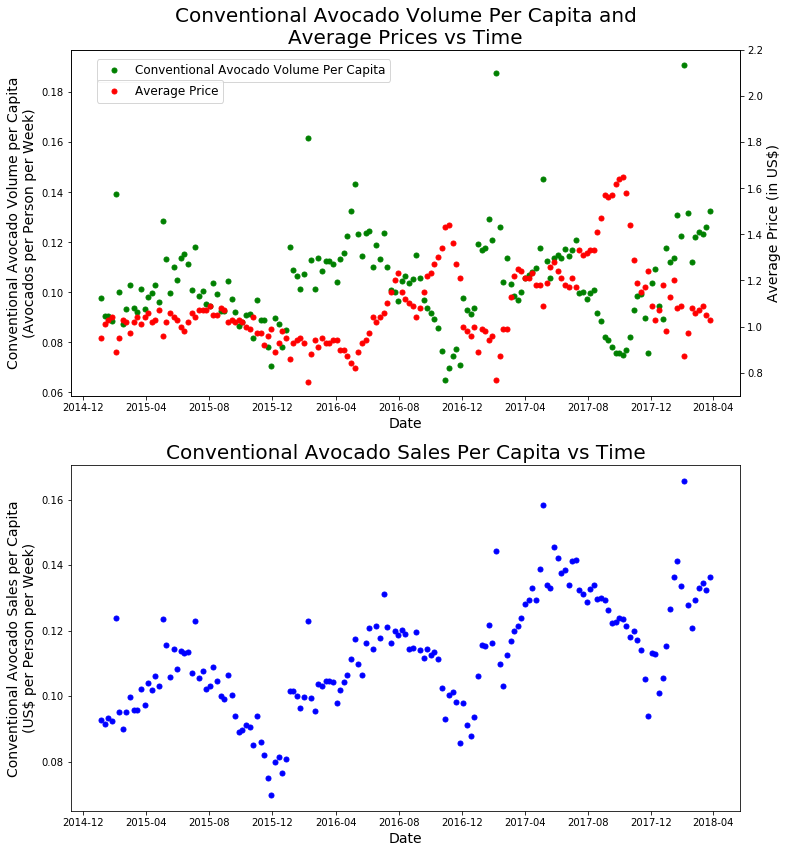

In [22]:
## Conventional Volume Per Capita and Average Prices Over Time

vol_region_type_df = avo_pop.groupby(['region', 'type'])

y1 = vol_region_type_df.get_group(('TotalUS', 'conventional'))
y2 = vol_region_type_df.get_group(('TotalUS', 'organic'))

# create a figure container 
fig, axes = plt.subplots(2, 1, figsize=(12,14))

# create axes 
axes[0].plot_date('Date','Vol_Per_Cap',data = y1, color = 'green', markersize=5, label='Conventional Avocado Volume Per Capita')
axes2 = axes[0].twinx()
axes2.plot_date('Date','AveragePrice',data = y1, color='red', markersize=5, label='Average Price')

axes[1].plot_date('Date','Sales_Per_Cap',data = y1, color='blue', markersize=5)

# set attributes
axes[0].set_xlabel('Date', fontsize = 14) 
axes[0].set_ylabel('Conventional Avocado Volume per Capita\n(Avocados per Person per Week)', fontsize = 14) 
axes2.set_ylabel('Average Price (in US$)', fontsize = 14)
axes[0].legend()
axes2.legend()
plt.ylim(0.7,2.2)
axes[1].set_xlabel('Date', fontsize = 14) 
axes[1].set_ylabel('Conventional Avocado Sales per Capita\n(US$ per Person per Week)', fontsize = 14)

axes[0].set_title('Conventional Avocado Volume Per Capita and\nAverage Prices vs Time', fontsize = 20)
axes[1].set_title('Conventional Avocado Sales Per Capita vs Time', fontsize = 20)

axes[0].legend(loc='upper left', bbox_to_anchor=(0.03,0.99), fontsize=12)
axes2.legend(loc='upper left', bbox_to_anchor=(0.03,0.93), fontsize=12)

plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plt.savefig('Figure_1.png')

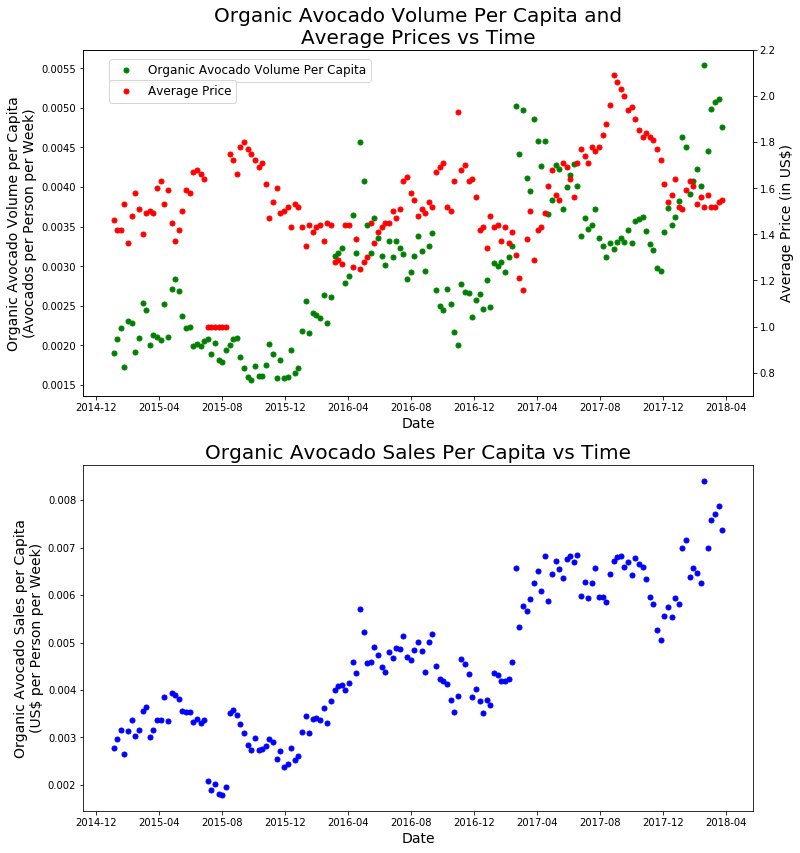

In [23]:
## Organic Volume Per Capita and Average Prices Over Time

vol_region_type_df = avo_pop.groupby(['region', 'type'])

y1 = vol_region_type_df.get_group(('TotalUS', 'conventional'))
y2 = vol_region_type_df.get_group(('TotalUS', 'organic'))

# create a figure container 
fig, axes = plt.subplots(2, 1, figsize=(12,14))

# create axes 
axes[0].plot_date('Date','Vol_Per_Cap',data = y2, color = 'green', markersize=5, label='Organic Avocado Volume Per Capita')
axes2 = axes[0].twinx()
axes2.plot_date('Date','AveragePrice',data = y2, color='red', markersize=5, label='Average Price')

axes[1].plot_date('Date','Sales_Per_Cap',data = y2, color='blue', markersize=5)

# set attributes
axes[0].set_xlabel('Date', fontsize = 14) 
axes[0].set_ylabel('Organic Avocado Volume per Capita\n(Avocados per Person per Week)', fontsize = 14) 
axes2.set_ylabel('Average Price (in US$)', fontsize = 14)
axes[0].legend()
axes2.legend()
plt.ylim(0.7,2.2)
axes[1].set_xlabel('Date', fontsize = 14) 
axes[1].set_ylabel('Organic Avocado Sales per Capita\n(US$ per Person per Week)', fontsize = 14)

axes[0].set_title('Organic Avocado Volume Per Capita and\nAverage Prices vs Time', fontsize = 20)
axes[1].set_title('Organic Avocado Sales Per Capita vs Time', fontsize = 20)

axes[0].legend(loc='upper left', bbox_to_anchor=(0.03,0.99), fontsize=12)
axes2.legend(loc='upper left', bbox_to_anchor=(0.03,0.93), fontsize=12)

plt.subplots_adjust(hspace=0.2)

# plt.savefig('Figure_2.png')

<font color=red>How have avocado sales in US trended over time?</font>

Text(0.5,1,'Organic Avocado Sales')

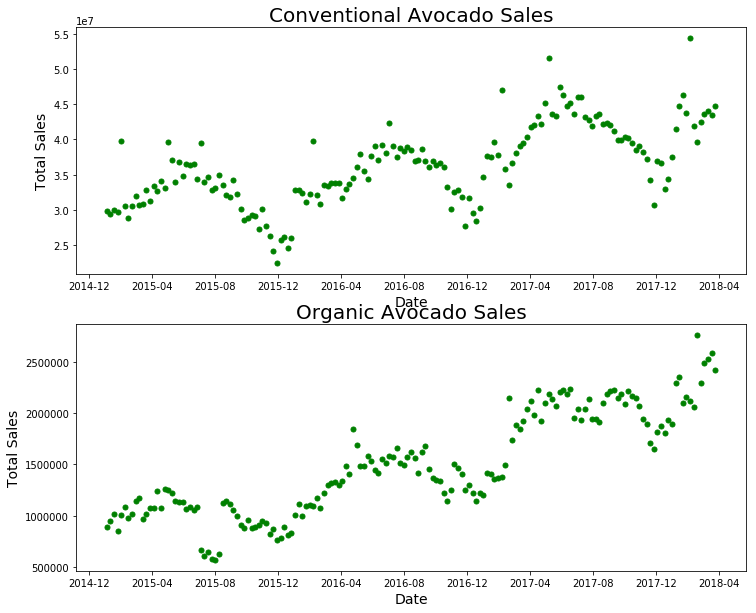

In [24]:
## Sales Over Time

# create a figure container 
fig, axes = plt.subplots(2, 1, figsize=(12,10))

# create axes 
axes[0].plot_date('Date','TotalSales',data = y1, color='green', markersize=5)
axes[1].plot_date('Date','TotalSales',data = y2, color='green', markersize=5)

# set attributes
axes[0].set_xlabel('Date', fontsize = 14) 
axes[0].set_ylabel('Total Sales', fontsize = 14) 
axes[1].set_xlabel('Date', fontsize = 14) 
axes[1].set_ylabel('Total Sales', fontsize = 14) 

axes[0].set_title('Conventional Avocado Sales', fontsize = 20)
axes[1].set_title('Organic Avocado Sales', fontsize = 20)


<font color=red>How have avocado sales per capita in the US trended over time?</font>

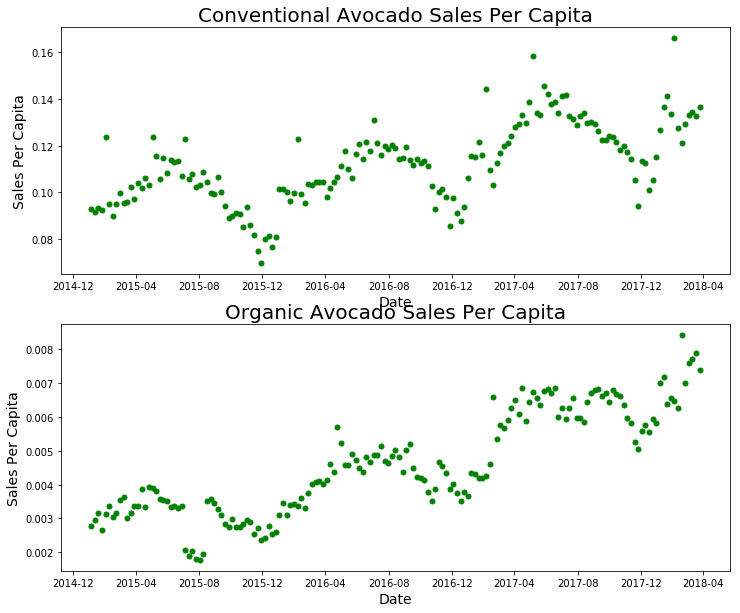

In [25]:
## Sales Per Capita Over Time

sales_per_cap_region_type_df = avo_pop.groupby(['region', 'type'])

y1 = sales_per_cap_region_type_df.get_group(('TotalUS', 'conventional'))
y2 = sales_per_cap_region_type_df.get_group(('TotalUS', 'organic'))

# create a figure container 
fig, axes = plt.subplots(2, 1, figsize=(12,10))

# create axes 
axes[0].plot_date('Date','Sales_Per_Cap',data = y1, color='green', markersize=5)
axes[1].plot_date('Date','Sales_Per_Cap',data = y2, color='green', markersize=5)

# set attributes
axes[0].set_xlabel('Date', fontsize = 14) 
axes[0].set_ylabel('Sales Per Capita', fontsize = 14) 
axes[1].set_xlabel('Date', fontsize = 14) 
axes[1].set_ylabel('Sales Per Capita', fontsize = 14) 

axes[0].set_title('Conventional Avocado Sales Per Capita', fontsize = 20)
axes[1].set_title('Organic Avocado Sales Per Capita', fontsize = 20)

pass

Text(0.5,1,'Organic Avocado Consumption Per Capita')

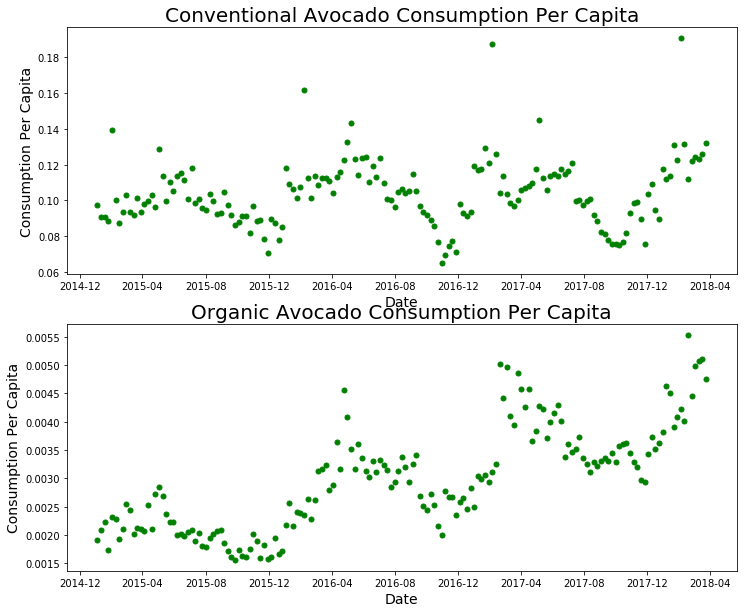

In [26]:
## Volume Per Capita Over Time

vol_region_type_df = avo_pop.groupby(['region', 'type'])

y1 = vol_region_type_df.get_group(('TotalUS', 'conventional'))
y2 = vol_region_type_df.get_group(('TotalUS', 'organic'))

# create a figure container 
fig, axes = plt.subplots(2, 1, figsize=(12,10))

# create axes 
axes[0].plot_date('Date','Vol_Per_Cap',data = y1, color='green', markersize=5)
axes[1].plot_date('Date','Vol_Per_Cap',data = y2, color='green', markersize=5)

# set attributes
axes[0].set_xlabel('Date', fontsize = 14) 
axes[0].set_ylabel('Consumption Per Capita', fontsize = 14) 
axes[1].set_xlabel('Date', fontsize = 14) 
axes[1].set_ylabel('Consumption Per Capita', fontsize = 14) 

axes[0].set_title('Conventional Avocado Consumption Per Capita', fontsize = 20)
axes[1].set_title('Organic Avocado Consumption Per Capita', fontsize = 20)
